In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import sys
import pandas as pd

import os

from pypdf import PdfReader
import fitz
import itertools

from pdf_extractor import PDFExtractor

In [5]:
pdf_path = "C:\\Users\\Sridhar Kamoji\\Downloads\\Income_Tax_Guidelines_for_Exemptions.pdf"
extractor = PDFExtractor(pdf_path)

In [6]:
pdf_doc = fitz.open(pdf_path)

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 12.68it/s]
C:\Users\Sridhar Kamoji\Python\Pdf_Parser\src\pdf_extractor.py:173: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  header_df["end_index"].fillna(self.expl_data.shape[0], inplace=True)


5 clusters for 410 blocks


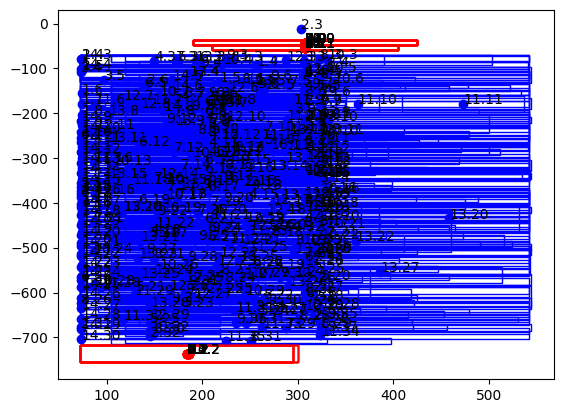

In [7]:
data = extractor.extract_all_text_blocks(process_data=True, plot_cluster=True)

In [8]:
data.keys()

dict_keys(['raw_data', 'processed_data'])

In [9]:
data["raw_data"].keys()

dict_keys(['document_name', 'local_doc_path', 'sections'])

In [10]:
raw_data = pd.DataFrame(data["raw_data"]["sections"])

In [11]:
reader = PdfReader(pdf_path)

In [12]:
reader

In [34]:
print("\n".join(list(itertools.chain.from_iterable(raw_data[(raw_data["page"] == 5) & (raw_data["cluster"] == 0)]['text_lst'].values.tolist()))))

2. Disallowed exemptions 
While you may enjoy reduced rates of tax, you as a taxpayer must forgo the below listed exemptions and allowances. 
Hence, if you choose the new tax regime no deduction or exemptions would be available under:  
• 
All chapter VIA section - 80C, 80CCC, 80CCD, 80D, 80DD, 80DDB, 80E, 80EEA, 80EEB, 80G, 80IA, 80IAB, 
80IAC, 80IB, 80IBA, 80Uetc. (Excluding Section 80CCD (2))  
• 
House Rent Allowance under section 10 (13A)  
• 
Leave Travel Concession under section 10(5)  
• 
Special Allowance under section 10(14) (such as Children education allowance, Hostel Allowance, Per 
diem Allowance, Uniform Allowance, etc.)  
• 
Interest on borrowed loan for a self-occupied property (Rented property not covered) under section 24. 
(Note: Interest claim for let out property remains the same)  
• 
Entertainment allowance, Employment / Professional tax under section 16.  
• 
Set off of any loss, under the head “Income from house property” with any other head of income;  
• 
An

In [19]:
toc = data["processed_data"]["table_of_contentx_(toc)"]
tables = data["processed_data"]["tables"]
content = (data["processed_data"]["sections"])

In [20]:
(toc)

[{'page': 1,
  'text': 'A ready reckoner for Investment Declarations ',
  'header_tag_md': 'h6'},
 {'page': 1,
  'text': 'Income Tax Guidelines for FY 2023-24 ',
  'header_tag_md': 'h2'},
 {'page': 2, 'text': 'Table of contents ', 'header_tag_md': nan},
 {'page': 2, 'text': 'Contents ', 'header_tag_md': nan},
 {'page': 2,
  'text': '1. New Tax Regime............................................................................................................................................... 4 ',
  'header_tag_md': nan},
 {'page': 2,
  'text': '2. Disallowed exemptions .................................................................................................................................. 5 ',
  'header_tag_md': nan},
 {'page': 2,
  'text': '3. Allowable exemptions .................................................................................................................................... 5 ',
  'header_tag_md': nan},
 {'page': 2,
  'text': '4. Traditional Tax Regime (Ol

In [21]:
tables

[{'page': 1, 'tables': []},
 {'page': 2, 'tables': []},
 {'page': 3, 'tables': []},
 {'page': 4,
  'tables': ['|TAX RATES: The same rate table applies to all individuals super senior citizen limits under the new tax regime.|Col2|Col3|(irrespective of the age group) Thus there are no senior or|Col5|Col6|\n|---|---|---|---|---|---|\n|||||||\n||Income tax slab|||Tax rate||\n|||||||\n|||||||\n||0 to 3 Lakh|||0%||\n|||||||\n|||||||\n||3 Lakh to 6 Lakh|||5%||\n|||||||\n|||||||\n||6 Lakh to 9 Lakh|||10%||\n|||||||\n|||||||\n||9 Lakh to 12 Lakh|||15%||\n|||||||\n|||||||\n||12 Lakh to 15 Lakh|||20%||\n|||||||\n|||||||\n||15 Lakh and above|||30%||\n|||||||\n\n']},
 {'page': 5, 'tables': []},
 {'page': 6,
  'tables': ['|Individuals less than 60 years:|Col2|Col3|Col4|Col5|Col6|\n|---|---|---|---|---|---|\n|||||||\n||Income tax slab|||Tax rate||\n|||||||\n|||||||\n||0 to 2.5 Lakh|||0%||\n|||||||\n|||||||\n||2.5 Lakh to 5 Lakh|||5%||\n|||||||\n|||||||\n||5 Lakh to 10 Lakh|||20%||\n|||||||\n|||||||\n

In [28]:
print("page No::", tables[3]["page"])
print("table :: \n", tables[3]["tables"][0])

page No:: 4
table :: 
 |TAX RATES: The same rate table applies to all individuals super senior citizen limits under the new tax regime.|Col2|Col3|(irrespective of the age group) Thus there are no senior or|Col5|Col6|
|---|---|---|---|---|---|
|||||||
||Income tax slab|||Tax rate||
|||||||
|||||||
||0 to 3 Lakh|||0%||
|||||||
|||||||
||3 Lakh to 6 Lakh|||5%||
|||||||
|||||||
||6 Lakh to 9 Lakh|||10%||
|||||||
|||||||
||9 Lakh to 12 Lakh|||15%||
|||||||
|||||||
||12 Lakh to 15 Lakh|||20%||
|||||||
|||||||
||15 Lakh and above|||30%||
|||||||




In [32]:
content[5: 10]

[{'title': '2. Disallowed exemptions ',
  'page_nos': [5],
  'content': 'While you may enjoy reduced rates of tax, you as a taxpayer must forgo the below listed exemptions and allowances. \nHence, if you choose the new tax regime no deduction or exemptions would be available under:  \n• \nAll chapter VIA section - 80C, 80CCC, 80CCD, 80D, 80DD, 80DDB, 80E, 80EEA, 80EEB, 80G, 80IA, 80IAB, \n80IAC, 80IB, 80IBA, 80Uetc. (Excluding Section 80CCD (2))  \n• \nHouse Rent Allowance under section 10 (13A)  \n• \nLeave Travel Concession under section 10(5)  \n• \nSpecial Allowance under section 10(14) (such as Children education allowance, Hostel Allowance, Per \ndiem Allowance, Uniform Allowance, etc.)  \n• \nInterest on borrowed loan for a self-occupied property (Rented property not covered) under section 24. \n(Note: Interest claim for let out property remains the same)  \n• \nEntertainment allowance, Employment / Professional tax under section 16.  \n• \nSet off of any loss, under the head “I